In [23]:
import serial
import matplotlib.pyplot as plt

# Collecting data from serial port and convert to list of decimal integers

SerialData = serial.Serial('com3', 115200)
count = 0
ListData = []

while True:
    if (SerialData.read() == b'\x00'):
        break

while True:  # (count<115200):
    Data = SerialData.read()
    if (Data != b'\x00'):
        ListData.append(Data)
        #count += 1
    else:
        break

SerialData.close()

CleanData = []
for i in range(len(ListData)):
    CleanData.append(int.from_bytes(ListData[i], "big"))
print(CleanData)


[127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 129, 129, 130, 131, 133, 136, 141, 147, 144, 122, 121, 120, 129, 114, 119, 122, 130, 131, 127, 116, 122, 123, 126, 122, 121, 127, 120, 125, 123, 126, 126, 125, 123, 123, 123, 130, 129, 132, 130, 129, 127, 126, 126, 126, 129, 131, 134, 132, 128, 128, 129, 128, 130, 131, 134, 134, 132, 130, 128, 130, 130, 130, 130, 132, 134, 134, 131, 130, 130, 130, 130, 130, 131, 133, 133, 131, 130, 130, 129, 129, 129, 130, 132, 132, 131, 129, 129, 128, 128, 129, 130, 132, 131, 130, 130, 128, 128, 128, 128, 129, 130, 131, 130, 128, 128, 128, 128, 128, 129, 131, 131, 131, 130, 129, 129, 129, 129, 129, 131, 132, 132, 131, 130, 129, 129, 129, 130, 132, 132, 132, 132, 131, 129, 129, 130, 131, 131, 132, 132, 132, 131, 129, 129, 130, 130, 131, 132, 132, 132, 131, 130, 129, 129, 129, 130, 131, 132, 132, 131, 129, 129, 129, 130, 129, 130, 131, 132, 131, 130, 129, 129, 129, 130, 129, 131, 131, 130, 129, 129, 129, 129, 129, 129, 130, 130, 131, 130, 129,

In [24]:
from scipy.io.wavfile import read, write
import io
import numpy

BytesData = numpy.array(CleanData, 'uint8')
print(BytesData)
#bytes_wav = bytes()
#byte_io = io.BytesIO(bytes_wav)
write('output.wav', 8000, BytesData)

#output_wav = byte_io.read()


[127 127 127 ... 125 124 122]


In [25]:
from scipy.io.wavfile import read, write
import io
import numpy


with open("output.wav", "rb") as wavfile:
    input_wav = wavfile.read()

rate, data = read(io.BytesIO(input_wav))
newListData = []
for i in range(len(data)):
    newListData.append(int.to_bytes(int(data[i]), 1, "big"))

print(rate)
print(newListData)


8000
[b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x80', b'\x80', b'\x81', b'\x81', b'\x82', b'\x83', b'\x85', b'\x88', b'\x8d', b'\x93', b'\x90', b'z', b'y', b'x', b'\x81', b'r', b'w', b'z', b'\x82', b'\x83', b'\x7f', b't', b'z', b'{', b'~', b'z', b'y', b'\x7f', b'x', b'}', b'{', b'~', b'~', b'}', b'{', b'{', b'{', b'\x82', b'\x81', b'\x84', b'\x82', b'\x81', b'\x7f', b'~', b'~', b'~', b'\x81', b'\x83', b'\x86', b'\x84', b'\x80', b'\x80', b'\x81', b'\x80', b'\x82', b'\x83', b'\x86', b'\x86', b'\x84', b'\x82', b'\x80', b'\x82', b'\x82', b'\x82', b'\x82', b'\x84', b'\x86', b'\x86', b'\x83', b'\x82', b'\x82', b'\x82', b'\x82', b'\x82', b'\x83', b'\x85', b'\x85', b'\x83', b'\x82', b'\x82', b'\x81', b'\x81', b'\x81', b'\x82', b'\x84', b'\x84', b'\x83', b'\x81', b'\x81', b'\x80', b'\x80', b'\x81', b'\x82', b'\x84', b'\x83', b'\x82', b'\x82', b'\x80', b'\x80', b'\x80', b'\x80', b'\x81', b'\x82', b'\x83', b'\x82', b'\x80', b'\x80', b'\x80', b'\x

In [147]:
import serial
SerialData = serial.Serial('com3', 80000)
for i in range(len(newListData)):
    output = SerialData.write(newListData[i])
#output = SerialData.write(b'\x00')
SerialData.close()


NameError: name 'newListData' is not defined

In [21]:
import serial
SerialData = serial.Serial('com3', 115200)
Text = "Once there was a man, his name was Jim. Jim had no friends until he went to the gym and met another man called Tim."
TextList = Text.split()
j = 0
while (j < 20000000):
    j += 1
for i in range(len(TextList)):
    SerialData.write(bytes(str(len(TextList[i])) + TextList[i], 'utf-8'))
    j = 0
    while (j < 5000000): #controls text rate, min = 1E6, max = 1E8?
        j += 1
SerialData.close()

In [19]:
SerialData.close()


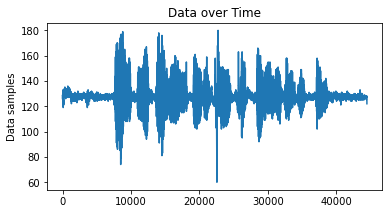

In [9]:
# Creating plot from data

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.clear()
ax.plot(range(len(CleanData)), CleanData)
plt.subplots_adjust(bottom=0.30)
plt.title('Data over Time')
plt.ylabel('Data samples')
plt.show()
